In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
!unzip /content/drive/MyDrive/smoke.zip -d /content/drive/MyDrive/dataset_smoke/

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dataset_smoke/train/labels/593_jpg.rf.3969b1d4077f88789162367657eda9f8.txt  
  inflating: /content/drive/MyDrive/dataset_smoke/train/labels/593_jpg.rf.cc7617b2e90184c52d740cec57bed9ce.txt  
  inflating: /content/drive/MyDrive/dataset_smoke/train/labels/594_jpg.rf.2d1edd261ea5305425c6fdd171a6fae2.txt  
  inflating: /content/drive/MyDrive/dataset_smoke/train/labels/594_jpg.rf.425b5a2ca84dcb51f27483d4c7e4ae4c.txt  
  inflating: /content/drive/MyDrive/dataset_smoke/train/labels/594_jpg.rf.4fbd05ad6a5247c50fa62ee7d3409591.txt  
  inflating: /content/drive/MyDrive/dataset_smoke/train/labels/594_jpg.rf.d42d4113b384d992cbfecde5d02de8cc.txt  
  inflating: /content/drive/MyDrive/dataset_smoke/train/labels/594_jpg.rf.de75dd3ef9b46eca092e2b789725de24.txt  
  inflating: /content/drive/MyDrive/dataset_smoke/train/labels/596_jpg.rf.5b62e0b85251dedc5b7e1b8cf0d13f96.txt  
  inflating: /content/drive/MyDrive/dataset_s

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
os.getcwd()

'/content'

In [ ]:
import os
os.chdir('/content/drive/My Drive/Datasets/dataset_smoke')

In [ ]:
# from pathlib import Path

# HOME = Path('/content/drive/My Drive/AIQ')
HOME = r'/content/drive/My Drive/Datasets/dataset_smoke'


In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]

100%|██████████| 5.35M/5.35M [00:00<00:00, 307MB/s]



0: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 93.2ms
Speed: 43.9ms preprocess, 93.2ms inference, 412.7ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = "5Ugy3JYmoSe5SdEzR5om"
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

#print(rf.workspace())
workspace = rf.workspace("dhruv-9udrw")
#print(workspace.projects())
project = workspace.project("smoking123-nh7kk-hotkq")
#print(project.versions())
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Smoking123-1 in yolov11:: 100%|██████████| 15522/15522 [02:12<00:00, 117.56it/s]


In [ ]:
os.listdir('/content/drive/My Drive/Datasets/dataset_smoke')

['data.yaml',
 'README.dataset.txt',
 'valid',
 'README.roboflow.txt',
 'test',
 'train',
 'yolo11n.pt',
 'Smoking123-1',
 'yolo11l.pt',
 'runs',
 'YOLO11']

In [ ]:
!ls /content/drive/MyDrive/Datasets/dataset_smoke/runs/detect/train/weights

best.pt  last.pt


In [ ]:
!yolo task=detect mode=train model=yolo11l.pt data='/content/drive/My Drive/dataset_smoke/data.yaml' epochs=50 imgsz=640 plots=True

100% 49.0M/49.0M [00:00<00:00, 136MB/s]
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/drive/My Drive/dataset_smoke/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

In [ ]:
!yolo task=detect mode=train model='/content/drive/MyDrive/dataset_smoke/runs/detect/train/weights/last.pt' data='/content/drive/My Drive/dataset_smoke/data.yaml' epochs=50 imgsz=640 plots=True resume=True

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/dataset_smoke/runs/detect/train/weights/last.pt, data=/content/drive/My Drive/dataset_smoke/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/drive/MyDrive/dataset_smoke/runs/detect/train/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=F

In [ ]:
from google.colab import files
model = YOLO('/content/drive/MyDrive/Datasets/dataset_smoke/runs/detect/train/weights/best.pt')  # Replace with your model's path
uploaded = files.upload()  # Upload the image
image_path = list(uploaded.keys())[0]  # Get the uploaded image file name
results = model.predict(source=image_path, save=True, save_txt=False)

Saving Screenshot (2).png to Screenshot (2).png

image 1/1 /content/drive/MyDrive/Datasets/dataset_smoke/Screenshot (2).png: 416x640 1 smoking, 75.0ms
Speed: 2.4ms preprocess, 75.0ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict4


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

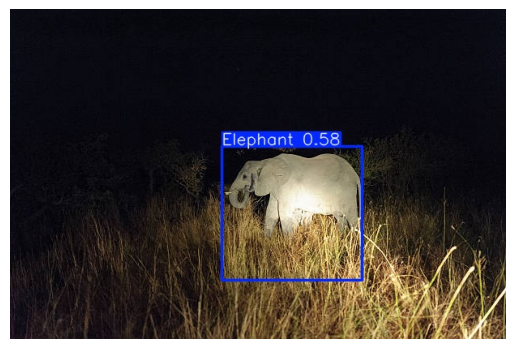

In [ ]:
output_image = cv2.imread('/content/drive/MyDrive/dataset/runs/detect/predict5/istockphoto-497615653-612x612.jpg')  # Adjust based on where results are saved
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the trained YOLO model
model = YOLO('/content/drive/My Drive/dataset_smoke/runs/detect/train/weights/best.pt')  # Replace with the correct path to your model

from google.colab import files

uploaded = files.upload()  # Upload the video file
video_path = list(uploaded.keys())[0]  # Get the uploaded video file name
cap = cv2.VideoCapture(video_path)

Saving WhatsApp Video 2025-02-04 at 23.09.26_81d4c68e.mp4 to WhatsApp Video 2025-02-04 at 23.09.26_81d4c68e.mp4


In [ ]:
# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
output_path = 'result4.mp4'
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Process video
frame_count = 0
skip_frames = 4  # Process every 4th frame

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Process only every 4th frame
    if frame_count % skip_frames == 0:
        results = model.predict(source=frame, save=False, conf=0.25)
        annotated_frame = results[0].plot()  # Draw detections
    else:
        annotated_frame = frame  # Use the original frame if skipped

    # Write the frame to the output video
    out.write(annotated_frame)
    frame_count += 1

# Release resources
cap.release()
out.release()

# Display the output video path
print(f"Output video saved at: {output_path}")



0: 384x640 1 smoking, 1088.6ms
Speed: 4.1ms preprocess, 1088.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 smoking, 1046.0ms
Speed: 2.7ms preprocess, 1046.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 smoking, 1059.2ms
Speed: 3.9ms preprocess, 1059.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 smoking, 1688.6ms
Speed: 3.3ms preprocess, 1688.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 1731.2ms
Speed: 3.8ms preprocess, 1731.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 1748.8ms
Speed: 4.5ms preprocess, 1748.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 1082.6ms
Speed: 3.7ms preprocess, 1082.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 1056.7ms
Speed: 3.4ms preprocess, 10

In [ ]:
os.listdir('/content/drive/My Drive/dataset/runs/detect/train2/')

['weights',
 'args.yaml',
 'events.out.tfevents.1732379557.ee95b96e8a38.11252.0',
 'labels_correlogram.jpg',
 'labels.jpg',
 'train_batch0.jpg',
 'train_batch1.jpg',
 'train_batch2.jpg',
 'results.csv',
 'val_batch0_labels.jpg',
 'PR_curve.png',
 'val_batch0_pred.jpg',
 'F1_curve.png',
 'P_curve.png',
 'R_curve.png',
 'confusion_matrix_normalized.png',
 'confusion_matrix.png',
 'results.png']

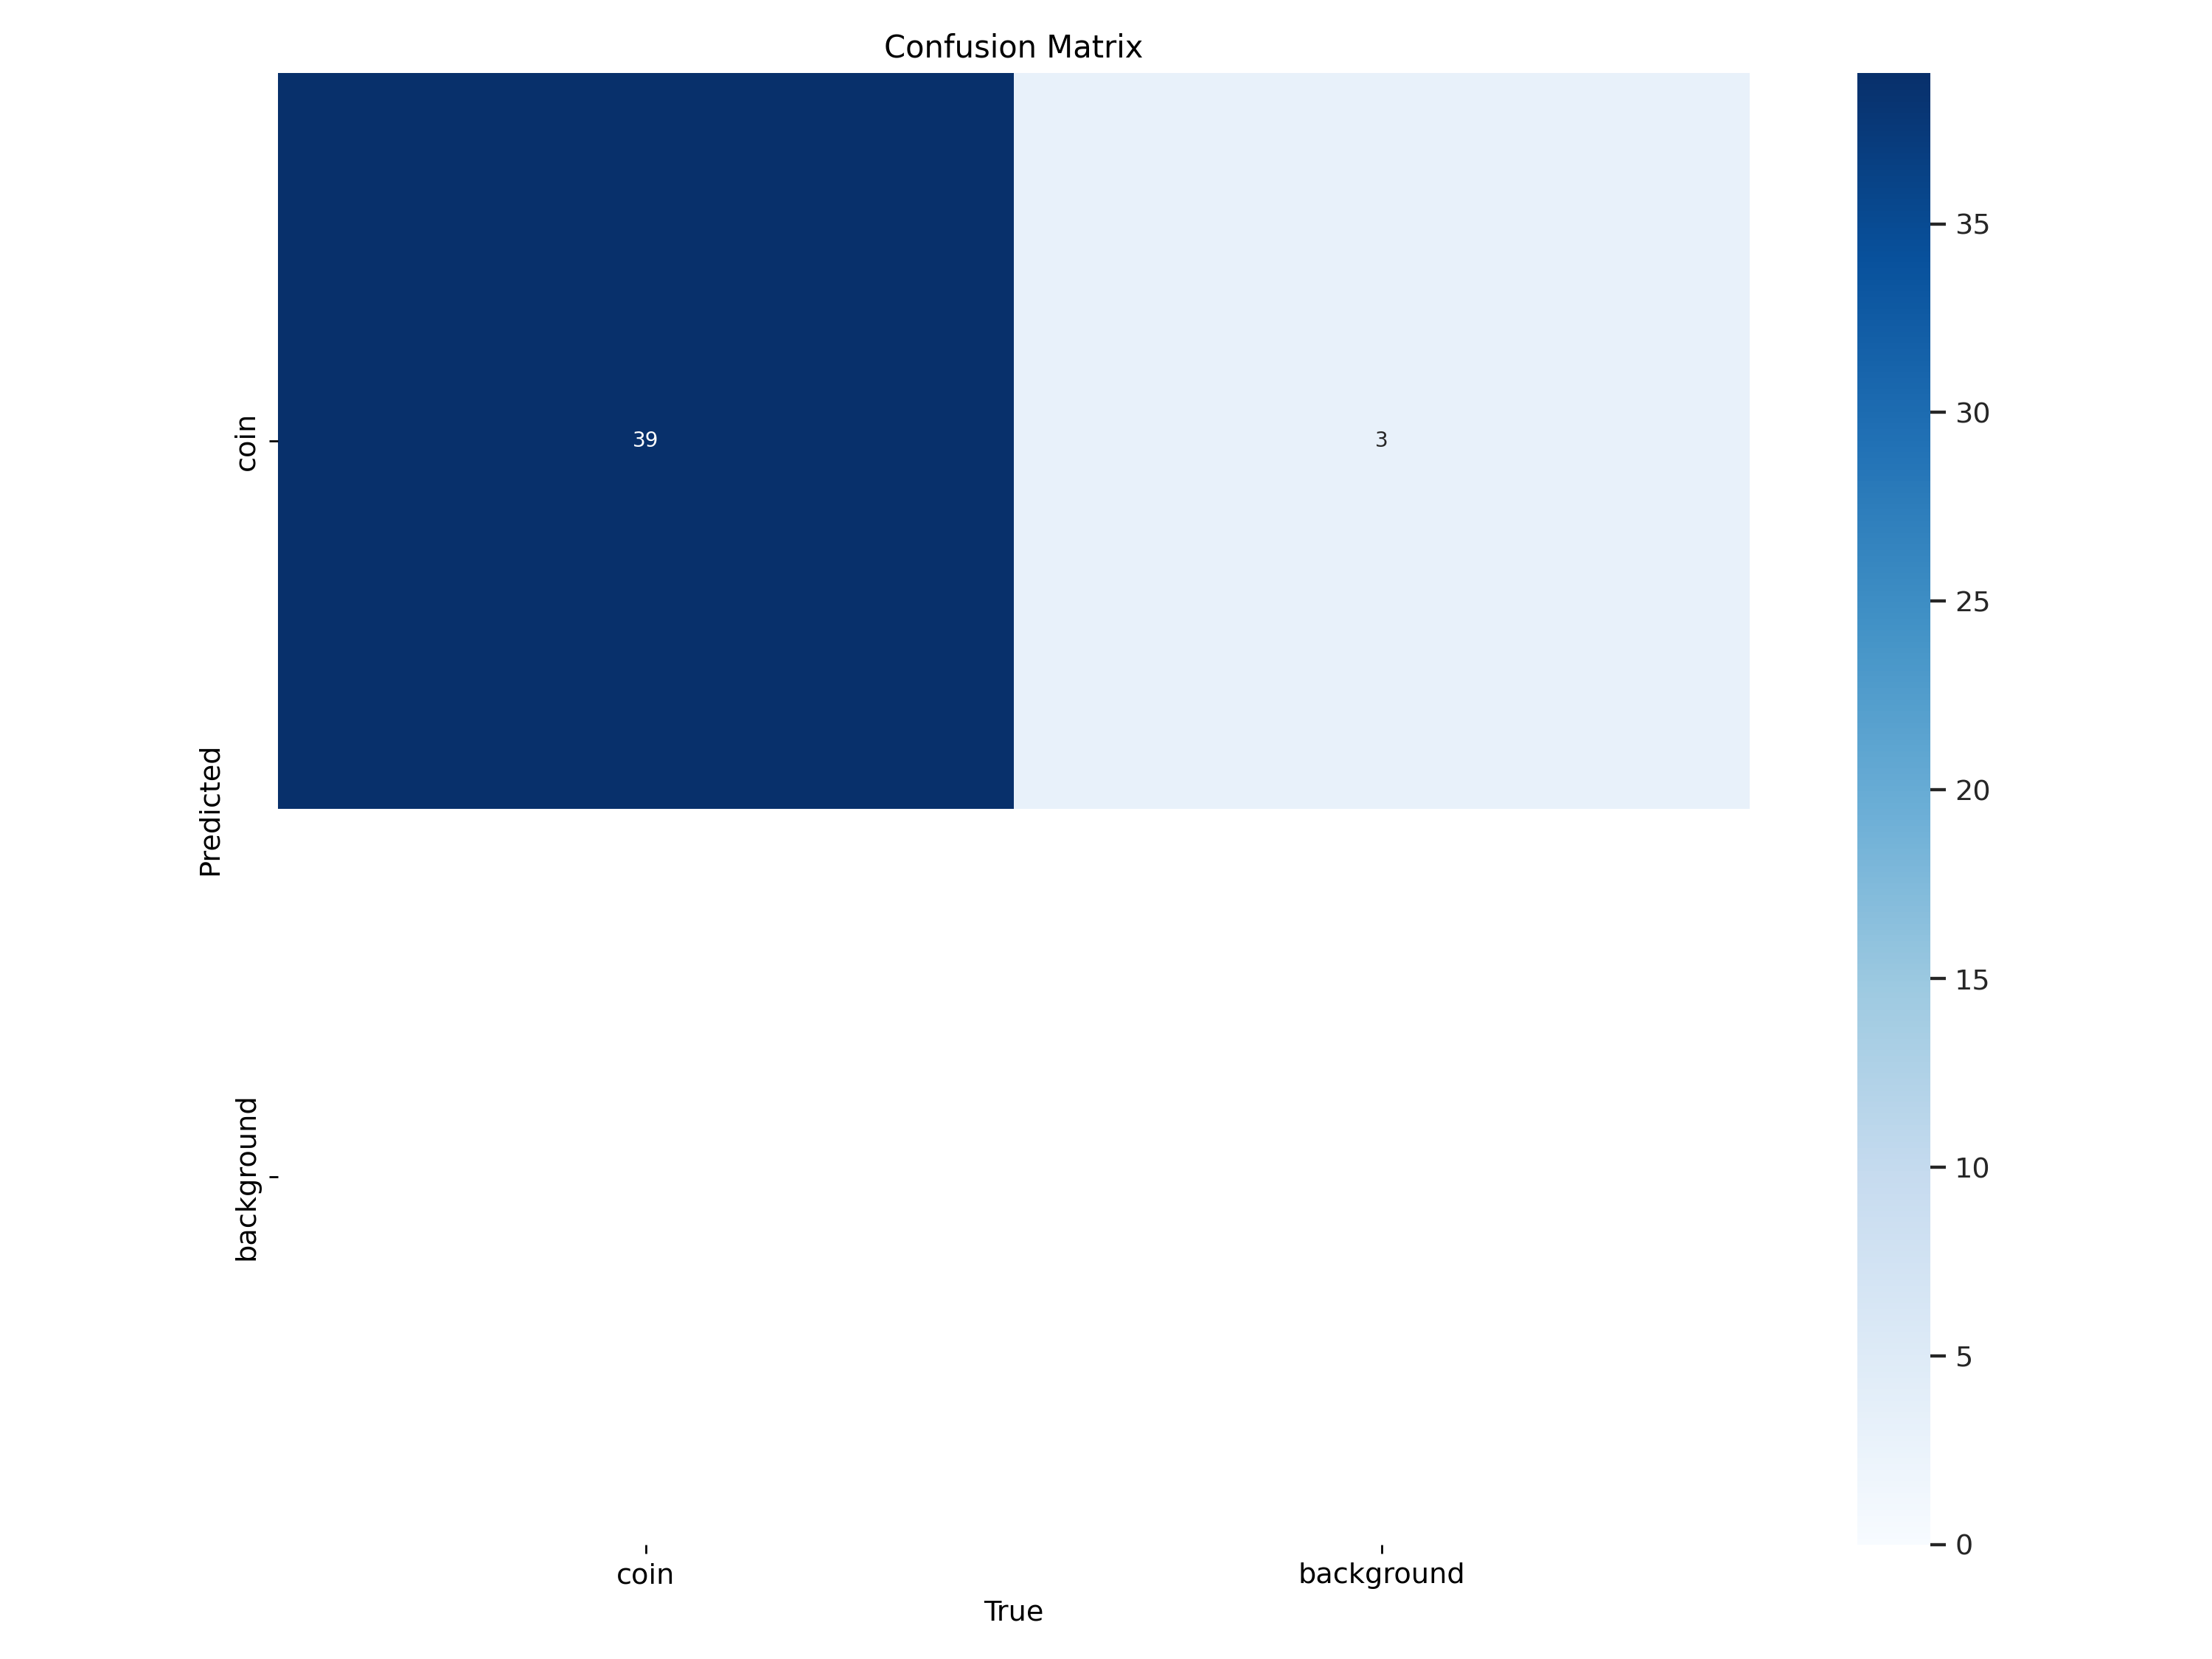

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/drive/My Drive/AIQ/runs/detect/train7/confusion_matrix.png', width=600)

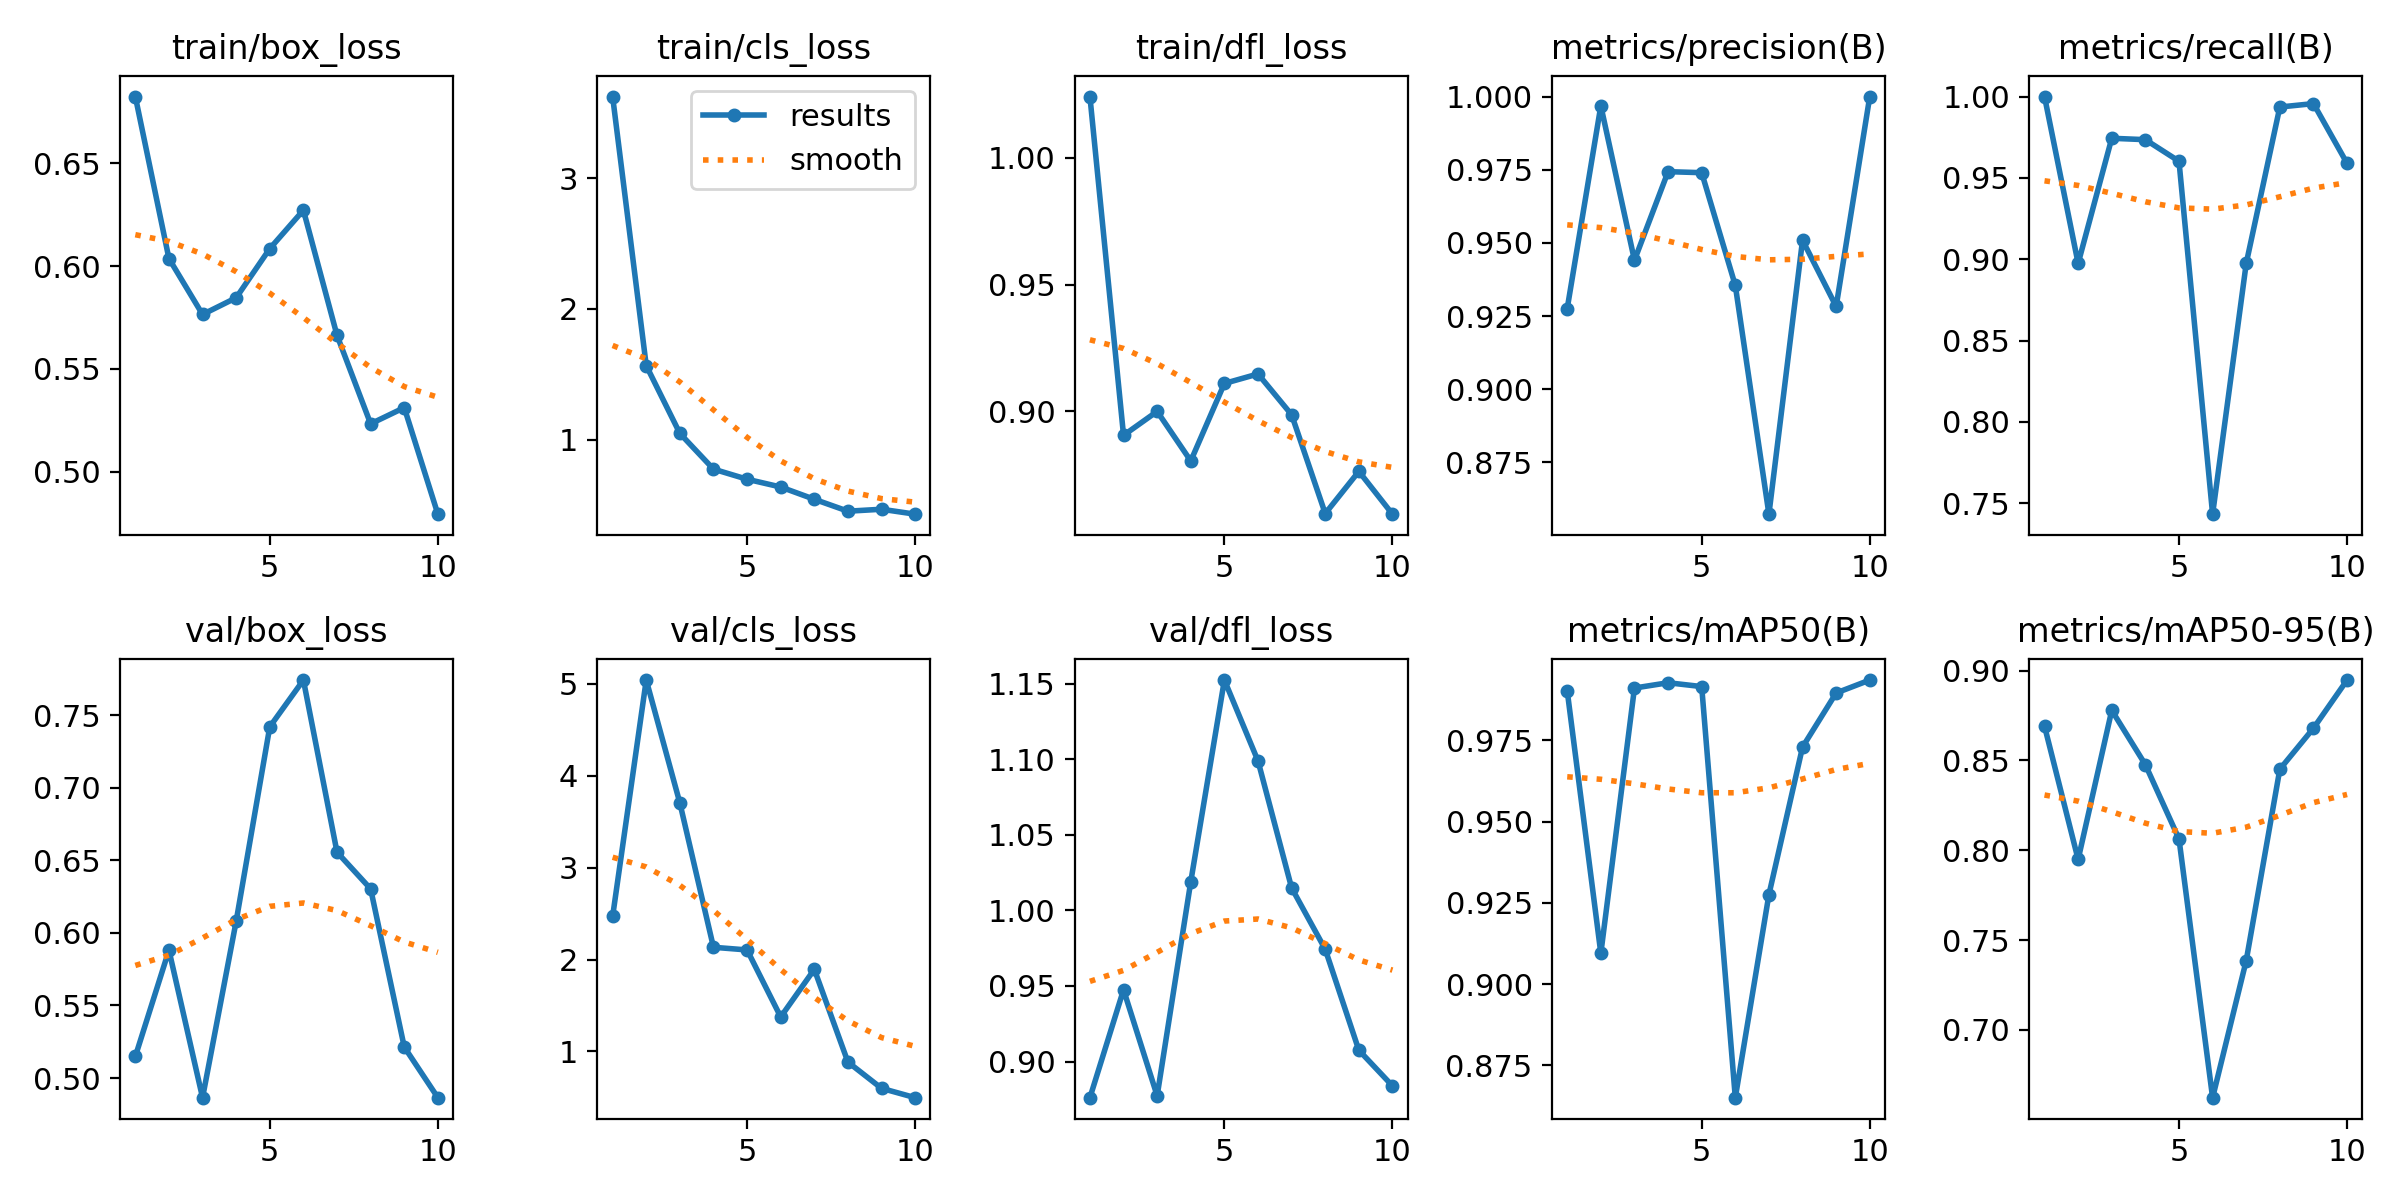

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/drive/My Drive/AIQ/runs/detect/train7/results.png', width=600)

In [ ]:
# import os

# def modify_labels(root_dir):
#     # Define the folders to process
#     folders = ['train', 'test', 'valid']

#     for folder in folders:
#         labels_dir = os.path.join(root_dir, folder, 'labels')

#         if not os.path.exists(labels_dir):
#             print(f"Labels folder not found: {labels_dir}")
#             continue

#         # Process each label file in the folder
#         for label_file in os.listdir(labels_dir):
#             label_path = os.path.join(labels_dir, label_file)

#             if not label_file.endswith('.txt'):
#                 continue

#             # Read and modify the label file
#             updated_lines = []
#             with open(label_path, 'r') as f:
#                 for line in f:
#                     parts = line.strip().split()
#                     if len(parts) > 0:
#                         class_id = int(parts[0])
#                         if class_id == 1:
#                             parts[0] = '0'  # Change label 1 to 0
#                         updated_lines.append(' '.join(parts))

#             # Write the modified content back to the file
#             with open(label_path, 'w') as f:
#                 f.write('\n'.join(updated_lines))

#             # print(f"Updated labels in: {label_path}")

# # Example usage
# root_dir = '/content/drive/My Drive/AIQ/aiq_dataset'
# modify_labels(root_dir)
